In [1]:
import pandas as a
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=a.read_csv(r"E:\xlsx\flat500.csv")

In [3]:
data.head(5)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [4]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1538 non-null   int64  
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 108.3+ KB


In [6]:
data.groupby(['model']).count()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
model,,,,,,,,
lounge,1094,1094,1094,1094,1094,1094,1094,1094
pop,358,358,358,358,358,358,358,358
sport,86,86,86,86,86,86,86,86


In [7]:
data['model'].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [8]:
data.shape

(1538, 9)

In [9]:
data1=data.drop(['lat','ID'],axis=1)

In [10]:
data2=data1.drop(['lon'],axis=1)

In [11]:
data2

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700
...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990


In [12]:
data2=a.get_dummies(data2,dtype=int)

In [25]:
data2


,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0
...,...,...,...,...,...,...,...,...
1533,51,3712,115280,1,5200,0,0,1
1534,74,3835,112000,1,4600,1,0,0
1535,51,2223,60457,1,7500,0,1,0
1536,51,2557,80750,1,5990,1,0,0


In [26]:
data_cor=data2.corr()

In [27]:
data_cor

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
engine_power,1.000000,0.319190,0.285495,-0.005030,-0.277235,-0.133321,0.024783,0.217362
age_in_days,0.319190,1.000000,0.833890,0.075775,-0.893328,-0.259863,0.108327,0.313276
km,0.285495,0.833890,1.000000,0.097539,-0.859373,-0.255746,0.109024,0.303874
previous_owners,-0.005030,0.075775,0.097539,1.000000,-0.076274,-0.024643,-0.019316,0.084129
price,-0.277235,-0.893328,-0.859373,-0.076274,1.000000,0.302299,-0.167190,-0.288706
model_lounge,-0.133321,-0.259863,-0.255746,-0.024643,0.302299,1.000000,-0.864605,-0.382017
model_pop,0.024783,0.108327,0.109024,-0.019316,-0.167190,-0.864605,1.000000,-0.134050
model_sport,0.217362,0.313276,0.303874,0.084129,-0.288706,-0.382017,-0.134050,1.000000


<Axes: >

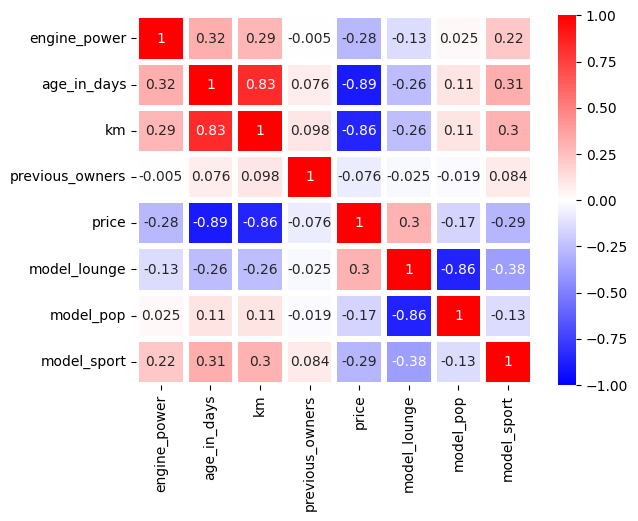

In [33]:
import seaborn as sb
sb.heatmap(data_cor,vmax=1,vmin=-1,annot=True,linewidth=4,cmap='bwr')

In [14]:
y=data2['price']
x=data2.drop(['price'],axis=1)

In [15]:
y

0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1538, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [17]:
x_test.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
481,51,3197,120000,2,0,1,0
76,62,2101,103000,1,0,1,0
1502,51,670,32473,1,1,0,0
669,51,913,29000,1,1,0,0
1409,51,762,18800,1,1,0,0


In [18]:
x_train.shape

(1030, 7)

In [19]:
y_train

527      9990
129      9500
602      7590
331      8750
323      9100
        ...  
1130    10990
1294     9800
860      5500
1459     9990
1126     8900
Name: price, Length: 1030, dtype: int64

In [20]:
y_train.shape

(1030,)

In [21]:
from  sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
LinearRegression()

LinearRegression()

In [23]:
ypred=reg.predict(x_test)

In [24]:
ypred

array([ 5867.6503378 ,  7133.70142341,  9866.35776216,  9723.28874535,
       10039.59101162,  9654.07582608,  9673.14563045, 10118.70728123,
        9903.85952664,  9351.55828437, 10434.34963575,  7732.26255693,
        7698.67240131,  6565.95240435,  9662.90103518, 10373.20344286,
        9599.94844451,  7699.34400418,  4941.33017994, 10455.2719478 ,
       10370.51555682, 10391.60424404,  7529.06622456,  9952.37340054,
        7006.13845729,  9000.1780961 ,  4798.36770637,  6953.10376491,
        7810.39767825,  9623.80497535,  7333.52158317,  5229.18705519,
        5398.21541073,  5157.65652129,  8948.63632836,  5666.62365159,
        9822.1231461 ,  8258.46551788,  6279.2040404 ,  8457.38443276,
        9773.86444066,  6767.04074749,  9182.99904787, 10210.05195479,
        8694.90545226, 10328.43369248,  9069.05761443,  8866.7826029 ,
        7058.39787506,  9073.33877162,  9412.68162121, 10293.69451263,
       10072.49011135,  6748.5794244 ,  9785.95841801,  9354.09969973,
      

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.8415526986865394

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,y_test)

581887.727391353

In [37]:
Results=a.DataFrame(columns=['price','predicted'])
Results['price']=y_test
Results['predicted']=ypred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(15)

,index,price,predicted,Id
0,481,7900,5867.650338,0
1,76,7900,7133.701423,1
2,1502,9400,9866.357762,2
3,669,8500,9723.288745,3
4,1409,9700,10039.591012,4
5,1414,9900,9654.075826,5
6,1089,9900,9673.145630,6
7,1507,9950,10118.707281,7
8,970,10700,9903.859527,8
9,1198,8999,9351.558284,9


[]

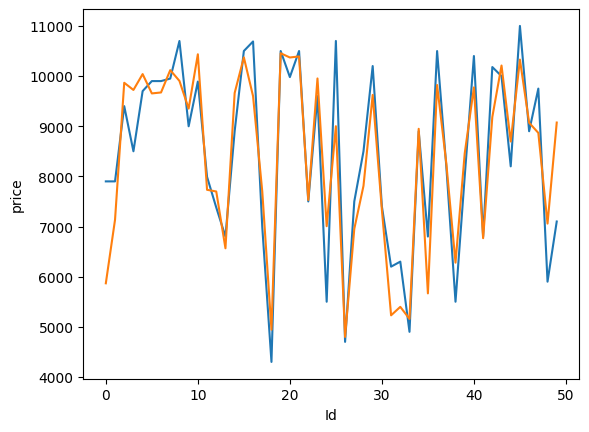

In [39]:
import matplotlib.pyplot as plt
sb.lineplot(x='Id',y='price',data=Results.head(50))#blue color
sb.lineplot(x='Id',y='predicted',data=Results.head(50))
plt.plot()